In [1]:
# define logging and working directory
import os
import logging
import platform
print(os.getcwd())
# change working directory to project root - neccessary for jupyter notebooks
if platform.system() is "Windows":
    os.chdir('G:\\sven\\git\\cardio')
else:
    os.chdir('/Users/minority/Code/Git/cardio')
print(os.getcwd())

from src.utils.utils_io import Console_and_file_logger, ensure_dir
from src.utils.myshow import myshow, myshow3d

Console_and_file_logger('describe_volumes', logging.INFO)

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import glob
from ipywidgets import interact
from src.utils.myshow import myshow, myshow3d
from scipy import stats
import SimpleITK as sitk
import numpy as np
import pandas as pd
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

G:\sven\git\cardio\notebooks\dataset_contours
G:\sven\git\cardio


2019-02-16 15:01:32,362 INFO -------------------- Start --------------------
2019-02-16 15:01:32,384 INFO Filename: describe_volumes
2019-02-16 15:01:32,385 INFO Log directory: ./logs/


Working directory: G:\sven\git\cardio.
Log dir: ./logs/


In [5]:
path = 'data/processed/train/numpy/'
df = pd.DataFrame()
df['files'] = glob.glob(os.path.join(path, '*.npy'))

In [6]:
df

,files
0,data/processed/train/images\0003-04NEJQUZ-2007...
1,data/processed/train/images\0006-0AE4R74L-1900...
2,data/processed/train/images\0007-0HQQW4ZN-2007...
3,data/processed/train/images\0008-0PTV75MP-2005...
4,data/processed/train/images\0010-0RPELLU8-2007...
5,data/processed/train/images\0013-13JLP3HN-2007...
6,data/processed/train/images\0014-1DRHF745-2005...
7,data/processed/train/images\0016-1E4PF7MR-2006...
8,data/processed/train/images\0018-1E8MCV9L-2005...
9,data/processed/train/images\0034-1Y8H8XLE-2007...


In [4]:
img = glob.glob(os.path.join(path, '*_clean_*.npy'))
msk = glob.glob(os.path.join(path, '*_mask_*.npy'))

# instantiate all image_slice objects as wrapper
images = [np.load(i_name) for i_name in img]
masks = [np.load(m_name) for m_name in msk]

In [6]:
# take second element for sort
def takeFirst(elem):
    return elem.shape[0]

In [7]:
images = sorted(images, key=takeFirst)

(156, 192, 1)


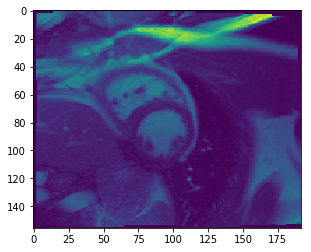

2019-02-14 17:29:36,025 INFO margin: -18
2019-02-14 17:29:36,025 INFO cropped
2019-02-14 17:29:36,025 INFO (156, 156, 1)
2019-02-14 17:29:36,025 INFO uint16


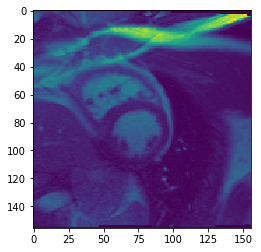

In [21]:
from numpy import newaxis
for img in images[:1]:
    img = img[:,:,newaxis]
    print(img.shape)
    plt.imshow(img[:,:,0])
    plt.show()
    h,w = img.shape[:2]
    if h != w:
        margin = (h - w)//2
        logging.info('margin: {}'.format(margin))
        # crop
        if margin > 0:
            img = img[margin:-margin,:]
        elif margin < 0:
            margin = -margin
            img = img[:,margin:-margin]

        logging.info('cropped')
        logging.info(img.shape)
        logging.info(img.dtype)
        plt.imshow(img[:,:,0])
        plt.show()

In [51]:
df = pd.DataFrame()
df['images'] = images
df['masks'] = masks
df['image_shapes'] = shapes_images
df['masks_shapes'] = shapes_masks
df['i_shape_x'], df['i_shape_y'] = zip(*shapes_images)
df['m_shape_x'], df['m_shape_y'] = zip(*shapes_masks)

In [52]:
df.describe()

,i_shape_x,i_shape_y,m_shape_x,m_shape_y
count,8895.000000,8895.000000,8895.000000,8895.000000
mean,253.630129,246.019112,253.630129,246.019112
std,44.435519,56.004177,44.435519,56.004177
min,156.000000,126.000000,156.000000,126.000000
25%,256.000000,256.000000,256.000000,256.000000
50%,256.000000,256.000000,256.000000,256.000000
75%,256.000000,256.000000,256.000000,256.000000
max,512.000000,512.000000,512.000000,512.000000


In [48]:
(df['image_shapes']< (256,256)).sum()

1743

In [23]:
len(masks)

8895

In [24]:
shapes_images = [img.shape for img in images]
shapes_masks = [mask.shape for mask in masks]

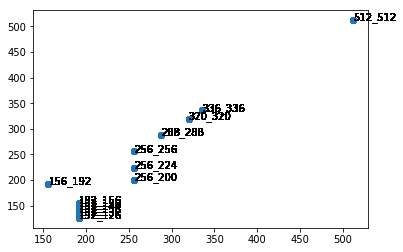

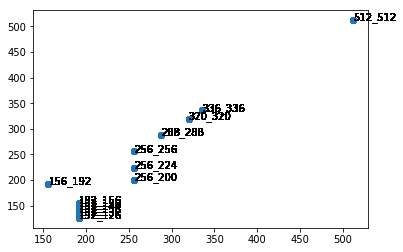

In [37]:
x,y = zip(*shapes_images)
fig, ax1 = plt.subplots()
ax1.scatter(x, y)
for i, txt in enumerate(shapes_images):
    ax1.annotate(str(x[i]) + '_'+  str(y[i]), (x[i], y[i]))
x,y = zip(*shapes_masks)
fig, ax2 = plt.subplots()
ax2.scatter(x, y)
for i, txt in enumerate(shapes_images):
    ax2.annotate(str(x[i]) + '_'+  str(y[i]), (x[i], y[i]))
plt.show()

In [33]:
# take second element for sort
def takeSecond(elem):
    return elem[1]

sorted(shapes_images, key=takeSecond)

[(192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),
 (192, 126),